In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

# 加载数据集
data = pd.read_csv("winequality-white.csv", sep=";")
print("原始数据集大小：", data.shape)

原始数据集大小： (4898, 12)


In [23]:
#接下来将对数据集进行二分类，赋予0或者1两个标签值
data['label'] = np.where(data['quality']>=7, 1, 0)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [24]:
#将新增的label列作为结果标签y。
#将除标签列外的所有数据用作特征向量X。
X=data.iloc[:, :-2].values
X
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: label, Length: 4898, dtype: int32

In [25]:
# 将数据集划分为训练集和测试集，其中test_size表示测试集所占比例
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# 利用 GMM 模型进行缺失值填充
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=150, random_state=0)
gmm.fit(X_train)

GaussianMixture(max_iter=150, n_components=2, random_state=0)

In [27]:
# 使用GMM模型对特征向量X_train进行训练，并预测结果y_train_pred
y_train_pred = gmm.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
# 计算模型在训练集上的准确性accuracy，并输出结果。
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")


Train accuracy: 0.6325


In [29]:
# 使用GMM模型对特征向量X_test进行预测，并计算在测试集上的准确性accuracy_test，并输出结果。
y_test_pred = gmm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.6276


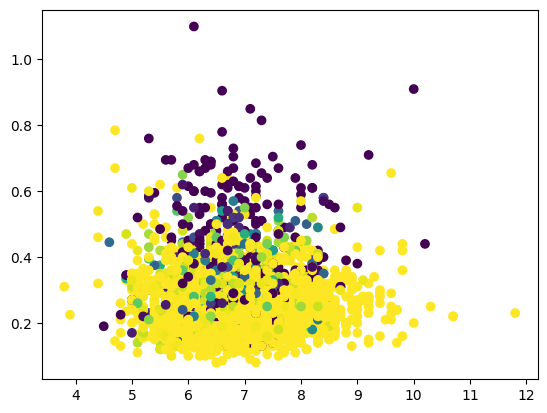

In [30]:
# 用matplotlib.pyplot库中的scatter函数绘制出不同聚类的数据点，其中x轴和y轴分别对应特征向量X的两个特征，并用不同颜色表示不同聚类。
X = gmm.predict_proba(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=X[:, 0])
plt.show()